<a href="https://colab.research.google.com/github/Abhishek-2004-17/Cat-and-Dog-Image-Classifier-task-2/blob/main/cat_and_dog_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:06<00:00, 98.0MB/s]
100% 1.06G/1.06G [00:06<00:00, 182MB/s] 


In [7]:
import zipfile
zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip")
zip_ref.extractall("/content")
zip_ref.close()

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [9]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [10]:
#normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [11]:
#creating CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 74s 103ms/step - loss: 1.2232 - accuracy: 0.5616 - val_loss: 0.6675 - val_accuracy: 0.5624
Epoch 2/10
625/625 [==============================] - 67s 106ms/step - loss: 0.6360 - accuracy: 0.6277 - val_loss: 0.6732 - val_accuracy: 0.5428
Epoch 3/10
625/625 [==============================] - 64s 101ms/step - loss: 0.5490 - accuracy: 0.6909 - val_loss: 0.5078 - val_accuracy: 0.7616
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4837 - accuracy: 0.7452 - val_loss: 0.4463 - val_accuracy: 0.7894
Epoch 5/10
625/625 [==============================] - 63s 100ms/step - loss: 0.4244 - accuracy: 0.7693 - val_loss: 0.5982 - val_accuracy: 0.7338
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3660 - accuracy: 0.8061 - val_loss: 0.5420 - val_accuracy: 0.7554
Epoch 7/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3149 - accuracy: 0.8313 - val_loss: 0.6532 - val_ac

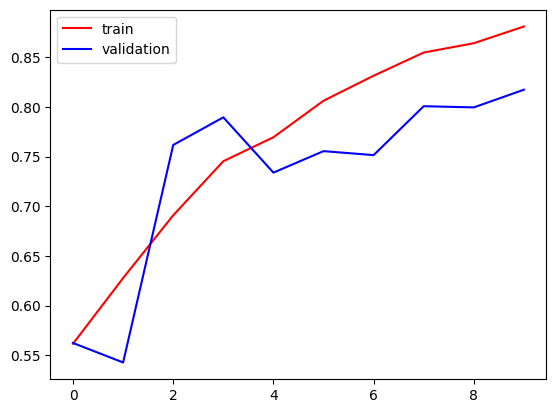

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

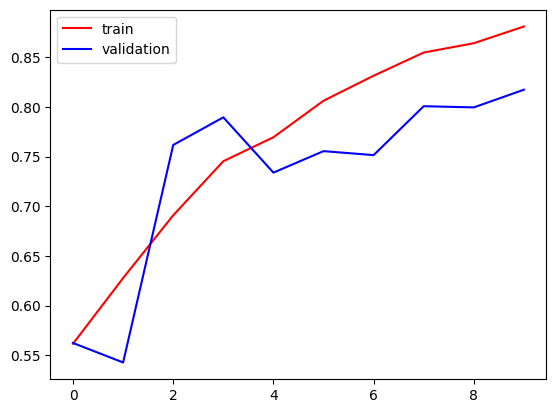

In [16]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

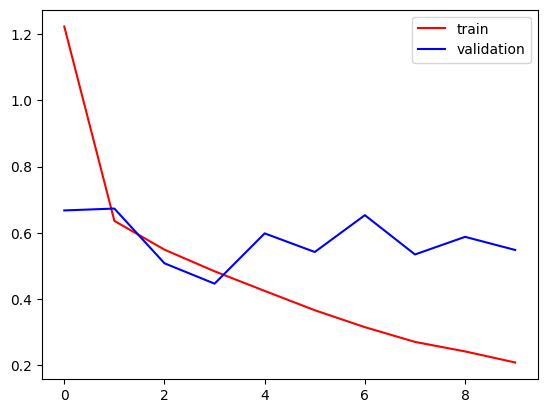

In [17]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

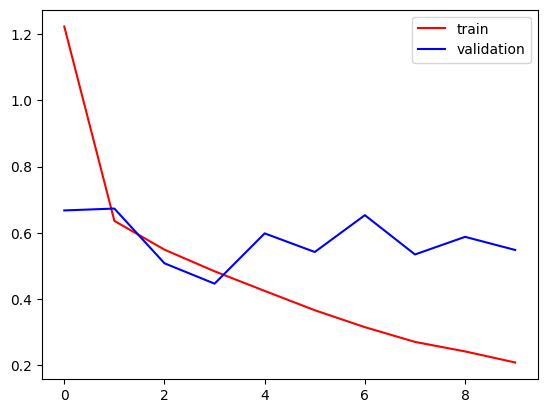

In [18]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [32]:
import cv2

In [65]:
test_img = cv2.imread('/content/cat1.png')

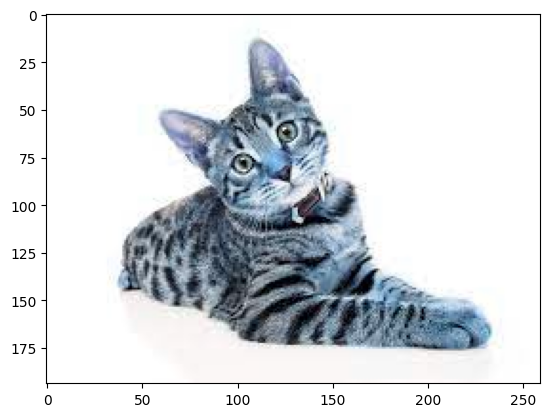

In [66]:
plt.imshow(test_img)

In [67]:
test_img.shape

(194, 259, 3)

In [68]:
test_img = cv2.resize(test_img,(256,256))

In [69]:
test_input = test_img.reshape((1,256,256,3))

In [70]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[0.48931426]], dtype=float32)